## Group Members: Jiaqi Lin 

##  Implementation Task 1

We implement the 1D example of least square problem for the IGD. Then problem is given by $$ \min_x \frac{1}{2} \sum_i (x-y_i)^2$$ where $y_i$ is a sequence of scalars sampled with certain given mean value $\mu$ and variance $\sigma^2$. Following the above method, the iteration will be $$x_{k+1}=x_k−\gamma_k(x_k−y_{i_k}) $$, where $y_{i_k}$  comes from the selected ordering.

In the first task, you need to implement the following functions.

In [67]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu - np.sqrt(3)*sigma, mu + np.sqrt(3)*sigma, n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
y_test

array([ 0.04300945, -0.02118719,  0.09551839, -0.03250601, -0.00013963])

###  Settings of the minimization problems
Now we will setup the problem with a sampling of $y$  vector with the following two different settings:

n, mu, sigma, dist = 105, 0.5, 1.0, "normal"

and

n, mu, sigma, dist = 105, 0.5, 1.0, "uniform"

Our initial guess will be  $x_0 = 0$  for both cases. The step length is taking the diminishing factor  $\gamma_k = \frac{1}{k+1}$ .

In [68]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

### Two orderings to experiment with
#### Random ordering with replacement 
In this case, we do not choose the fixed ordering, we sample a number in  {1,2,…,n}  each time and follow the iteration.

#### Random ordering without replacement 
In this case, we do not choose the fixed ordering, we sample an ordering without replacement from  {1,2,…,n}  and then follow the iteration.

In [69]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace = True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    xf = np.zeros([2,n + 1])
    xf[1, 0] = sum((y-xf[0,0])**2)/2
    for i in range(n):
        xf[0, i+1] = xf[0, i] - (xf[0, i]-y[ordering[i]])/(1+i)
        xf[1, i+1] = sum((y-xf[0,i+1])**2)/2
        
    return xf


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    xf = np.zeros([2,n + 1])
    xf[1, 0] = sum((y-xf[0,0])**2)/2
    for i in range(n):
        xf[0, i+1] = xf[0, i] - (xf[0, i]-y[ordering[i]])/(1+i)
        xf[1, i+1] = sum((y-xf[0,i+1])**2)/2
        
    return xf

In [70]:
xf11 = IGD_wr_task1(y1)
xf12 = IGD_wo_task1(y1)

xf21 = IGD_wr_task1(y2)
xf22 = IGD_wo_task1(y2)


### The results

We see from the plots below that the values of the object function seems to converge faster for the method without replacement.

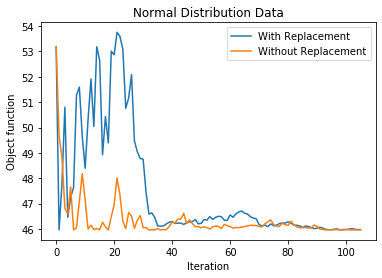

In [71]:
import matplotlib.pyplot as plt

n = len(y1)
t = np.linspace(0,n,n+1)

plt.plot(t, xf11[1,:])
plt.plot(t, xf12[1,:])

plt.title('Normal Distribution Data')
plt.xlabel('Iteration')
plt.ylabel('Object function')

plt.legend(labels=['With Replacement','Without Replacement'],loc='best')

plt.show()

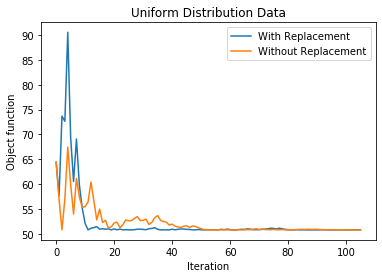

In [72]:
plt.plot(t, xf21[1,:])
plt.plot(t, xf22[1,:])

plt.title('Uniform Distribution Data')
plt.xlabel('Iteration')
plt.ylabel('Object function')

plt.legend(labels=['With Replacement','Without Replacement'],loc='best')

plt.show()

## Implementation Task 2

Instead of the problem in Task 1, we consider another problem, which is quite simple.

$$\min_x \frac{1}{2}\sum_{i=1}^n \beta_i (x - y)^2$$
here $\beta_i$ are positive weights, $y$ is a scalar. Clearly the minimum is at $x = y$. We try to use the IGD to solve the problem. 

$$x_{k+1} = x_k - \gamma_k \beta_{i_k} (x_k - y)$$

where $\gamma_k\equiv \gamma = 0.95 \min \beta_i^{-1}$. For simplicity, the $\beta_i$ are sampled uniformly between $[1,2]$. 
Task 2 is the same as the task1,  use two kinds of ordering to solve the problem and compare the results through figures.

In [73]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(beta, y):
    n = len(beta)
    gam = 0.95*min(1/beta)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    xf = np.zeros([2,n + 1])
    xf[1, 0] = sum(beta*(xf[0,0]-y)**2)/2
    for i in range(n):
        xf[0, i+1] = xf[0, i] - (xf[0, i]-y)*beta[ordering[i]]*gam
        xf[1, i+1] = sum(beta*(y-xf[0,i+1])**2)/2
        
    return xf


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(beta, y):
    n = len(beta)
    gam = 0.95*min(1/beta)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    xf = np.zeros([2,n + 1])
    xf[1, 0] = sum(beta*(xf[0,0]-y)**2)/2
    for i in range(n):
        xf[0, i+1] = xf[0, i] - (xf[0, i]-y)*beta[ordering[i]]*gam
        xf[1, i+1] = sum(beta*(y-xf[0,i+1])**2)/2
        
    return xf

### The results

We see from the plot below that the values of the object function converges rapidly in both cases. We cannot tell which method is better.

####  Note
It is ridiculous to claim $y$ as a scalar and put $y$ as the input in the same way as in Task 1. So I modified the function according to the object function.

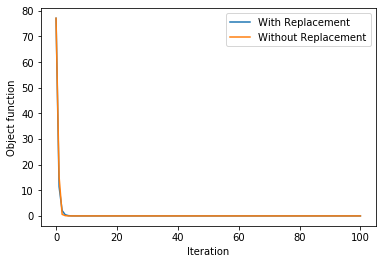

In [74]:
n = 100
beta = np.random.uniform(1, 2, n)

xf11 = IGD_wr_task2(beta, 1)
xf12 = IGD_wo_task2(beta, 1)

t = np.linspace(0,n,n+1)

plt.plot(t, xf11[1,:])
plt.plot(t, xf12[1,:])

plt.xlabel('Iteration')
plt.ylabel('Object function')

plt.legend(labels=['With Replacement','Without Replacement'],loc='best')

plt.show()

## Implementation Task 3

Now instead of 1D problem considered in above two tasks, we will consider the general case in higher dimensions, we study the least square problem to find solution of 
$$Ax = y$$
where $A$ is an $m\times n$ matrix and $x$ is a vector in $\mathbb{R}^n$. In most cases, $m \ge n$ which means the measurement is redundant for this linear model.  We denote the $i$th column $A^T$ as $a_i$ (namely the $i$th row of $A$ transposed), then we are minimizing

$$\min_x \sum_{i=1}^m (a_i^T x - y_i)^2$$
each $a_i\in\mathbb{R}^n$. 

And using IGD to minimize above problem with certain ordering. The step size $\gamma$ is  taken as a fixed constant, say $10^{-3}$, which is a common value for GD. 

Each iteration will be 

$$x_{k+1} = x_k - \gamma a_{i_k} (a_{i_k}^T x_{k} - y_{i_k})$$

Your initial guess is still all zeros vector. 

### Generation of $y$
The $y$ vector is generated by taking the following form
$$y_i = a_i^T x^{\ast} + w_i$$
where $w_i$ obeys normal distribution of zero mean and variance of $\rho^2$, here $\rho = 10^{-2}$. 

In [75]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [76]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [77]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    m, n  = A.shape
    gam = 0.001
    ordering = np.random.choice(m, m, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    xf = np.zeros([n + 1, m + 1])
    xf[n, 0] = sum((A@xf[0:n,0]-y)**2)/2
    for i in range(m):
        xf[0:n, i+1] = xf[0:n, i] - A[ordering[i],:]*(A[ordering[i],:]@xf[0:n, i]-y[ordering[i]])*gam
        xf[n, i+1] = sum((A@xf[0:n,i+1]-y)**2)/2
        
    return xf


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    m, n  = A.shape
    gam = 0.001
    ordering = np.random.choice(m, m, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    xf = np.zeros([n + 1, m + 1])
    xf[n, 0] = sum((A@xf[0:n,0]-y)**2)/2
    for i in range(m):
        xf[0:n, i+1] = xf[0:n, i] - A[ordering[i],:]*(A[ordering[i],:]@xf[0:n, i]-y[ordering[i]])*gam
        xf[n, i+1] = sum((A@xf[0:n,i+1]-y)**2)/2
        
    return xf

### The results

We see from the plot below that the values of the object function converges in similar rates. The method without replacement is a little better, but not significantly better. Meanwhile we need more iterations to reach the true minimum.


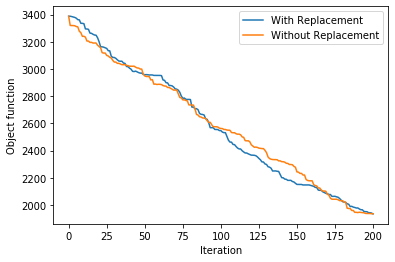

In [78]:
xf1_3 = IGD_wr_task3(y, A)
xf2_3 = IGD_wo_task3(y, A)

m, n  = A.shape
t = np.linspace(0,m,m+1)

plt.plot(t, xf1_3[n,:])
plt.plot(t, xf2_3[n,:])

plt.xlabel('Iteration')
plt.ylabel('Object function')

plt.legend(labels=['With Replacement','Without Replacement'],loc='best')

plt.show()